In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.9 MB/s eta 0:00:00


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 75s 718ms/step - accuracy: 0.3725 - loss: 1.2888 - val_accuracy: 0.3680 - val_loss: 1.7324
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 53s 584ms/step - accuracy: 0.5549 - loss: 1.0554 - val_accuracy: 0.5838 - val_loss: 1.1984
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 53s 585ms/step - accuracy: 0.8291 - loss: 0.4873 - val_accuracy: 0.6244 - val_loss: 1.2005
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 53s 586ms/step - accuracy: 0.8565 - loss: 0.3993 - val_accuracy: 0.7107 - val_loss: 1.3889
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 54s 599ms/step - accuracy: 0.9171 - loss: 0.2570 - val_accuracy: 0.7183 - val_loss: 1.3800
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 54s 603ms/step - accuracy: 0.9202 - loss: 0.2428 - val_accuracy: 0.7183 - val_loss: 2.0180
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 54s 595ms/step - accuracy: 0.9331 - loss: 0.2013 - val_accuracy: 0.7259 - val_loss: 1.7207
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 53s 591ms/step - accuracy: 0.9470 - loss: 0.1615 - val_accu

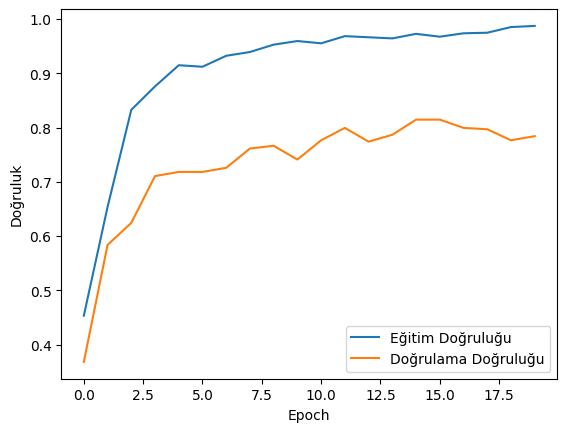

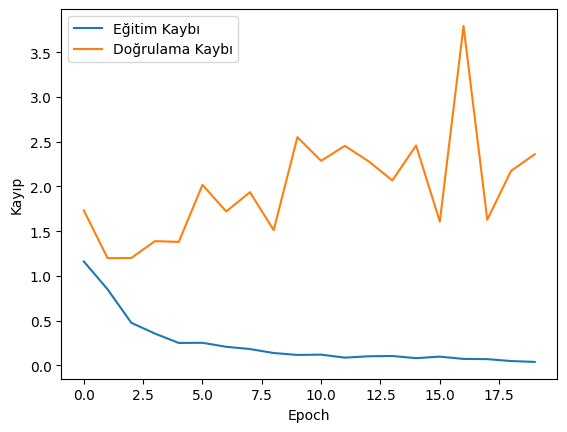

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step


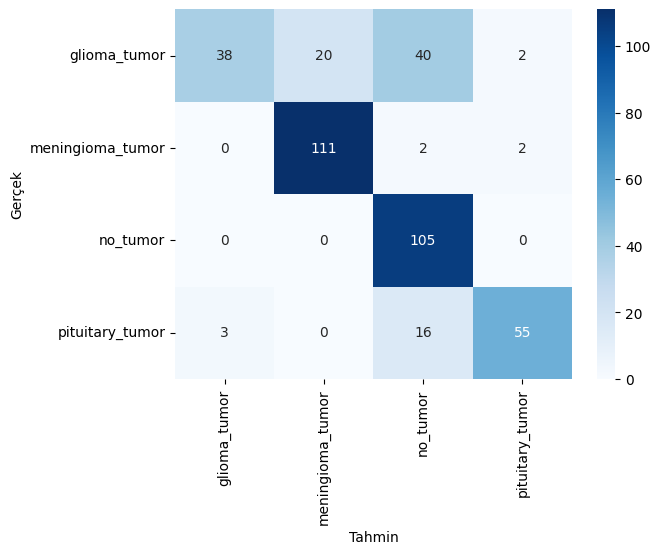

                  precision    recall  f1-score   support

    glioma_tumor       0.93      0.38      0.54       100
meningioma_tumor       0.85      0.97      0.90       115
        no_tumor       0.64      1.00      0.78       105
 pituitary_tumor       0.93      0.74      0.83        74

        accuracy                           0.78       394
       macro avg       0.84      0.77      0.76       394
    weighted avg       0.83      0.78      0.76       394



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# En iyi hiperparametreler
en_iyi_hyperparams = {
    'learning_rate': 0.00041248867914744496,
    'dropout_rate': 0.6821414360457165,
    'units': 499
}

# Veri yolları
train_dir = 'drive/MyDrive/dataset/Training'
test_dir = 'drive/MyDrive/dataset/Testing'

# Veri artırma ve normalizasyon
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

# Model oluşturma
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-4]:  # Son 4 katmanı eğitilebilir bırakıyoruz
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(en_iyi_hyperparams['units'], activation='relu')(x)
x = Dropout(en_iyi_hyperparams['dropout_rate'])(x)
output_layer = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=en_iyi_hyperparams['learning_rate']),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(train_generator, validation_data=test_generator, epochs=20, batch_size=32)

# Eğitim doğruluk grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

# Model değerlendirme
y_true, y_pred = [], []
for i in range(len(test_generator)):
    X, y = test_generator[i]
    predictions = model.predict(X)
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(predictions, axis=1))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()

report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print(report)


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1008s 11s/step - accuracy: 0.2857 - loss: 1.5387 - val_accuracy: 0.1904 - val_loss: 1.4047
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 86s 557ms/step - accuracy: 0.3774 - loss: 1.3033 - val_accuracy: 0.2487 - val_loss: 1.6904
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 52s 574ms/step - accuracy: 0.4911 - loss: 1.0623 - val_accuracy: 0.2868 - val_loss: 1.6299
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 51s 565ms/step - accuracy: 0.6549 - loss: 0.8130 - val_accuracy: 0.5990 - val_loss: 1.2042
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 51s 569ms/step - accuracy: 0.8450 - loss: 0.4318 - val_accuracy: 0.6954 - val_loss: 1.2369
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 51s 565ms/step - accuracy: 0.8894 - loss: 0.3307 - val_accuracy: 0.6294 - val_loss: 1.7178
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 568ms/step - accuracy: 0.8970 - loss: 0.2901 - val_accuracy: 0.6574 - val_loss: 2.1279
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 51s 567ms/step - accuracy: 0.8976 - loss: 0.3019 - val_accu

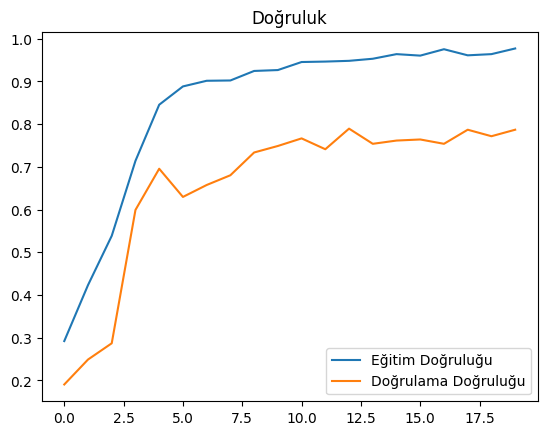

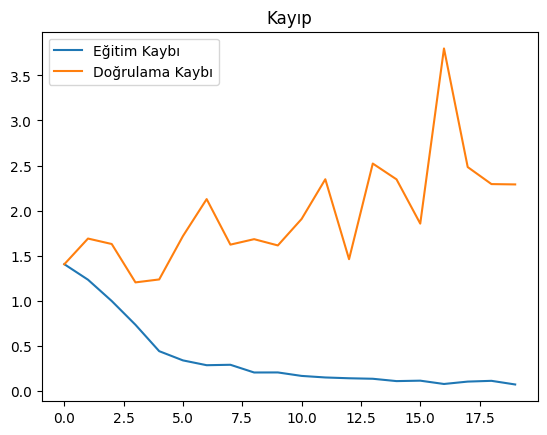

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


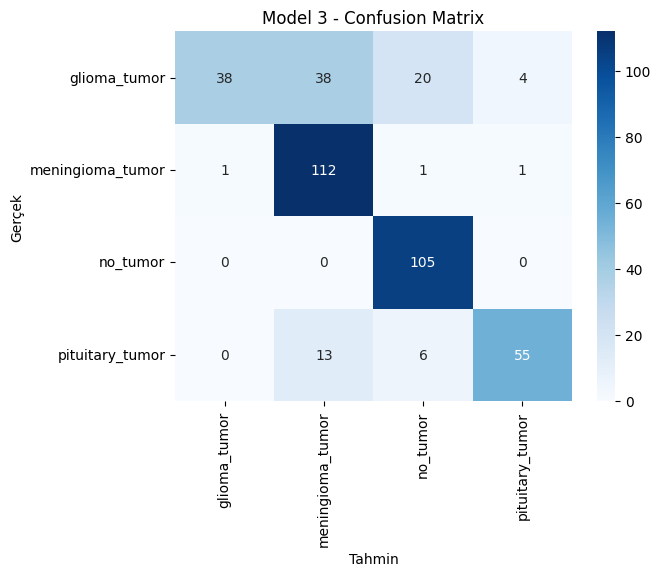

                  precision    recall  f1-score   support

    glioma_tumor       0.97      0.38      0.55       100
meningioma_tumor       0.69      0.97      0.81       115
        no_tumor       0.80      1.00      0.89       105
 pituitary_tumor       0.92      0.74      0.82        74

        accuracy                           0.79       394
       macro avg       0.84      0.77      0.76       394
    weighted avg       0.83      0.79      0.76       394



In [ ]:
# Gerekli kütüphaneler
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Rastgele hiperparametreler
rastgele_hyperparams = {
    'learning_rate': 0.001,
    'dropout_rate': 0.5,
    'units': 256
}

# Veri yolları
train_dir = 'drive/MyDrive/dataset/Training'
test_dir = 'drive/MyDrive/dataset/Testing'

# Veri artırma ve normalizasyon
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

# Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-4]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(rastgele_hyperparams['units'], activation='relu')(x)
x = Dropout(rastgele_hyperparams['dropout_rate'])(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=rastgele_hyperparams['learning_rate']),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Eğitim
history = model.fit(train_generator, validation_data=test_generator, epochs=20, batch_size=32)

# Grafik
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.legend(); plt.title("Doğruluk"); plt.show()

plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.legend(); plt.title("Kayıp"); plt.show()

# Değerlendirme
y_true, y_pred = [], []
for i in range(len(test_generator)):
    X, y = test_generator[i]
    preds = model.predict(X)
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title("Model 3 - Confusion Matrix")
plt.xlabel('Tahmin'); plt.ylabel('Gerçek'); plt.show()

print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 60s 611ms/step - accuracy: 0.4249 - loss: 1.2509 - val_accuracy: 0.5381 - val_loss: 1.5214 - learning_rate: 4.1249e-04
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 51s 564ms/step - accuracy: 0.7820 - loss: 0.6117 - val_accuracy: 0.6574 - val_loss: 1.4073 - learning_rate: 4.1249e-04
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 83s 576ms/step - accuracy: 0.8635 - loss: 0.3832 - val_accuracy: 0.6980 - val_loss: 1.3451 - learning_rate: 4.1249e-04
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 50s 554ms/step - accuracy: 0.8906 - loss: 0.3170 - val_accuracy: 0.7157 - val_loss: 1.3856 - learning_rate: 4.1249e-04
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 84s 573ms/step - accuracy: 0.9301 - loss: 0.2061 - val_accuracy: 0.7614 - val_loss: 1.1411 - learning_rate: 4.1249e-04
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 51s 562ms/step - accuracy: 0.9254 - loss: 0.2104 - val_accuracy: 0.7919 - val_loss: 1.5762 - learning_rate: 4.1249e-04
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 50s 560ms/step - acc

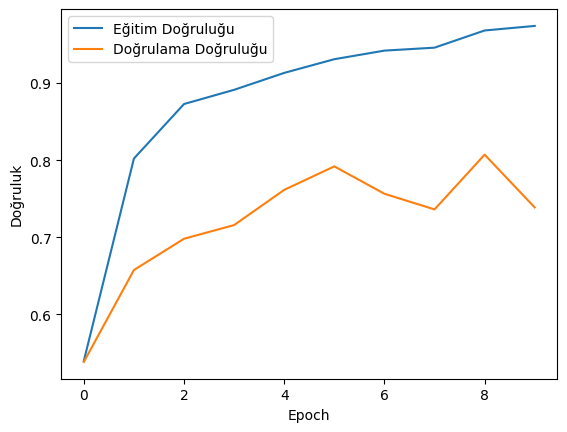

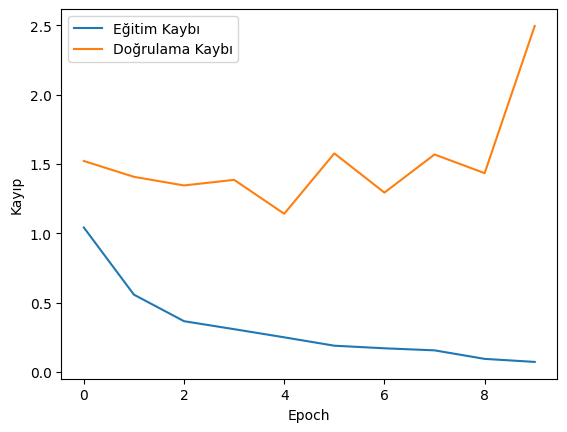

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


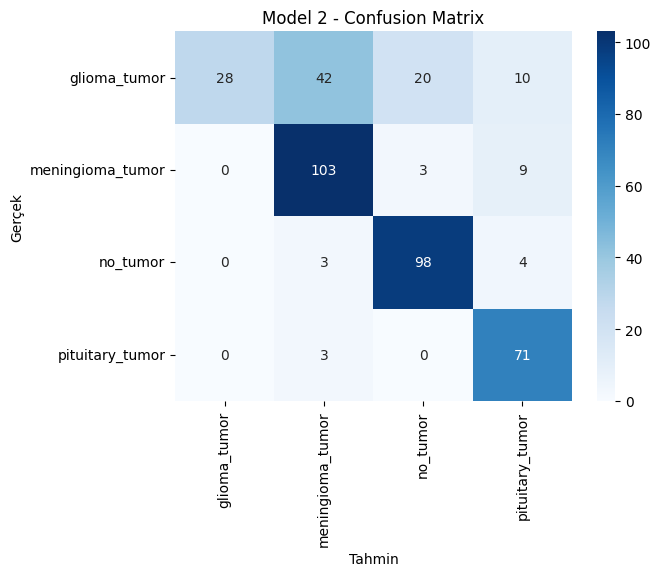

Sınıflandırma Raporu (F1-score dahil):
                  precision    recall  f1-score   support

    glioma_tumor       1.00      0.28      0.44       100
meningioma_tumor       0.68      0.90      0.77       115
        no_tumor       0.81      0.93      0.87       105
 pituitary_tumor       0.76      0.96      0.85        74

        accuracy                           0.76       394
       macro avg       0.81      0.77      0.73       394
    weighted avg       0.81      0.76      0.73       394

Makro Ortalama F1-Score: 0.7311


In [ ]:
# Gerekli kütüphaneler
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns

# En iyi hiperparametreler
en_iyi_hyperparams = {
    'learning_rate': 0.00041248867914744496,
    'dropout_rate': 0.6821414360457165,
    'units': 499
}

# Veri yolları
train_dir = 'drive/MyDrive/dataset/Training'
test_dir = 'drive/MyDrive/dataset/Testing'

# Veri artırma
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=True)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

# Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-4]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(en_iyi_hyperparams['units'], activation='relu')(x)
x = Dropout(en_iyi_hyperparams['dropout_rate'])(x)
output_layer = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=en_iyi_hyperparams['learning_rate']),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Eğitim
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, reduce_lr]
)

# Grafikler
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch'); plt.ylabel('Doğruluk'); plt.legend(); plt.show()

plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch'); plt.ylabel('Kayıp'); plt.legend(); plt.show()

# Model değerlendirme (F1-score)
y_true, y_pred = [], []
for i in range(len(test_generator)):
    X, y = test_generator[i]
    preds = model.predict(X)
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title("Model 2 - Confusion Matrix")
plt.xlabel('Tahmin'); plt.ylabel('Gerçek'); plt.show()

# Classification Report
print("Sınıflandırma Raporu (F1-score dahil):")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# F1-score
f1 = f1_score(y_true, y_pred, average='macro')
print(f"Makro Ortalama F1-Score: {f1:.4f}")

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 63s 652ms/step - accuracy: 0.4282 - loss: 1.2342 - val_accuracy: 0.4188 - val_loss: 1.6774 - learning_rate: 1.0000e-04
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 624ms/step - accuracy: 0.7569 - loss: 0.6537 - val_accuracy: 0.5990 - val_loss: 1.4662 - learning_rate: 1.0000e-04
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 625ms/step - accuracy: 0.8238 - loss: 0.4754 - val_accuracy: 0.6523 - val_loss: 1.3932 - learning_rate: 1.0000e-04
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 632ms/step - accuracy: 0.8362 - loss: 0.4351 - val_accuracy: 0.6675 - val_loss: 1.1345 - learning_rate: 1.0000e-04
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 626ms/step - accuracy: 0.8501 - loss: 0.4093 - val_accuracy: 0.6675 - val_loss: 1.4572 - learning_rate: 1.0000e-04
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 624ms/step - accuracy: 0.8623 - loss: 0.3976 - val_accuracy: 0.6624 - val_loss: 1.2035 - learning_rate: 1.0000e-04
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 83s 637ms/step - acc

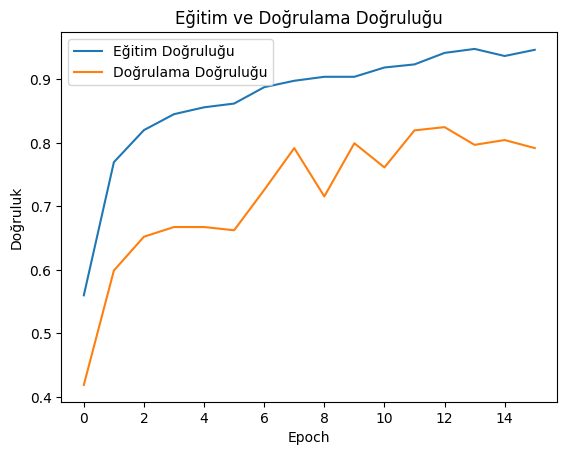

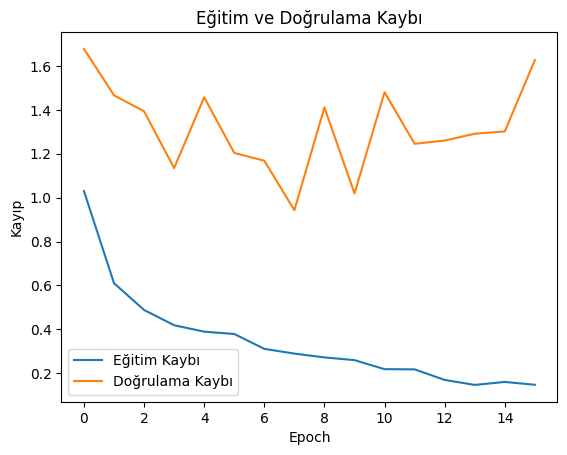

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step


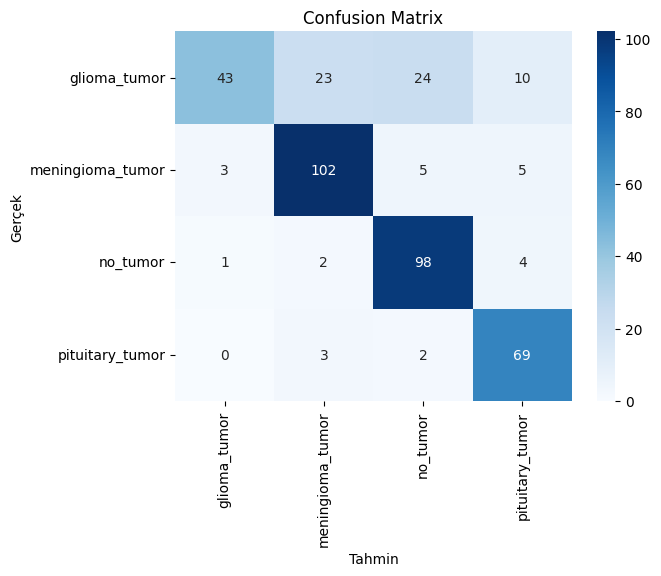

Sınıflandırma Raporu (F1-score dahil):
                  precision    recall  f1-score   support

    glioma_tumor       0.91      0.43      0.59       100
meningioma_tumor       0.78      0.89      0.83       115
        no_tumor       0.76      0.93      0.84       105
 pituitary_tumor       0.78      0.93      0.85        74

        accuracy                           0.79       394
       macro avg       0.81      0.80      0.78       394
    weighted avg       0.81      0.79      0.77       394

Makro Ortalama F1-Score: 0.7768


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns

# En iyi hiperparametreler
en_iyi_hyperparams = {
    'learning_rate': 0.0001,  # Daha küçük öğrenme oranı
    'dropout_rate': 0.5,  # Dropout oranını biraz düşürme
    'units': 512  # Dense katmanındaki nöron sayısını artırma
}

# Veri yolları
train_dir = 'drive/MyDrive/dataset/Training'
test_dir = 'drive/MyDrive/dataset/Testing'

# Veri artırma (augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Rotasyon aralığını artırıyoruz
    width_shift_range=0.3,  # Genişlik kaymasını artırıyoruz
    height_shift_range=0.3,  # Yükseklik kaymasını artırıyoruz
    shear_range=0.3,  # Yığılma dönüşümünü ekliyoruz
    zoom_range=0.3,  # Zoom yapma aralığını artırıyoruz
    horizontal_flip=True,
    brightness_range=[0.7, 1.3]  # Işıklandırma artırma
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=True)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

# Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-4]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(en_iyi_hyperparams['units'], activation='relu')(x)
x = Dropout(en_iyi_hyperparams['dropout_rate'])(x)
output_layer = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=en_iyi_hyperparams['learning_rate']),
              loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)  # Patience artırma
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1)  # Daha erken azaltma

# Eğitim
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, reduce_lr]
)

# Grafikler
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.show()

plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.title('Eğitim ve Doğrulama Kaybı')
plt.show()

# Model değerlendirme (F1-score)
y_true, y_pred = [], []
for i in range(len(test_generator)):
    X, y = test_generator[i]
    preds = model.predict(X)
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()

# Classification Report
print("Sınıflandırma Raporu (F1-score dahil):")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# F1-score
f1 = f1_score(y_true, y_pred, average='macro')
print(f"Makro Ortalama F1-Score: {f1:.4f}")